## 결정 트리

## 0.노트설정

In [1]:
%config InlineBackend.figure_format='retina'

In [2]:
from preamble import *

## 모듈 불러오기

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 데이터 적재

In [4]:
cancer = load_breast_cancer()

## 살펴보기

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)

## 학습 및 모델

In [6]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

## 평가 및 검증

In [7]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9882629107981221, 0.951048951048951)

[Text(0.5735294117647058, 0.9, 'worst radius <= 16.795\nsamples = 426\nvalue = [159, 267]\nclass = 양성'),
 Text(0.3235294117647059, 0.7, 'worst concave points <= 0.136\nsamples = 284\nvalue = [25, 259]\nclass = 양성'),
 Text(0.17647058823529413, 0.5, 'radius error <= 1.048\nsamples = 252\nvalue = [4, 248]\nclass = 양성'),
 Text(0.11764705882352941, 0.3, 'smoothness error <= 0.003\nsamples = 251\nvalue = [3, 248]\nclass = 양성'),
 Text(0.058823529411764705, 0.1, 'samples = 4\nvalue = [1, 3]\nclass = 양성'),
 Text(0.17647058823529413, 0.1, 'samples = 247\nvalue = [2, 245]\nclass = 양성'),
 Text(0.23529411764705882, 0.3, 'samples = 1\nvalue = [1, 0]\nclass = 악성'),
 Text(0.47058823529411764, 0.5, 'worst texture <= 25.62\nsamples = 32\nvalue = [21, 11]\nclass = 악성'),
 Text(0.35294117647058826, 0.3, 'worst smoothness <= 0.179\nsamples = 12\nvalue = [3, 9]\nclass = 양성'),
 Text(0.29411764705882354, 0.1, 'samples = 10\nvalue = [1, 9]\nclass = 양성'),
 Text(0.4117647058823529, 0.1, 'samples = 2\nvalue = [2, 

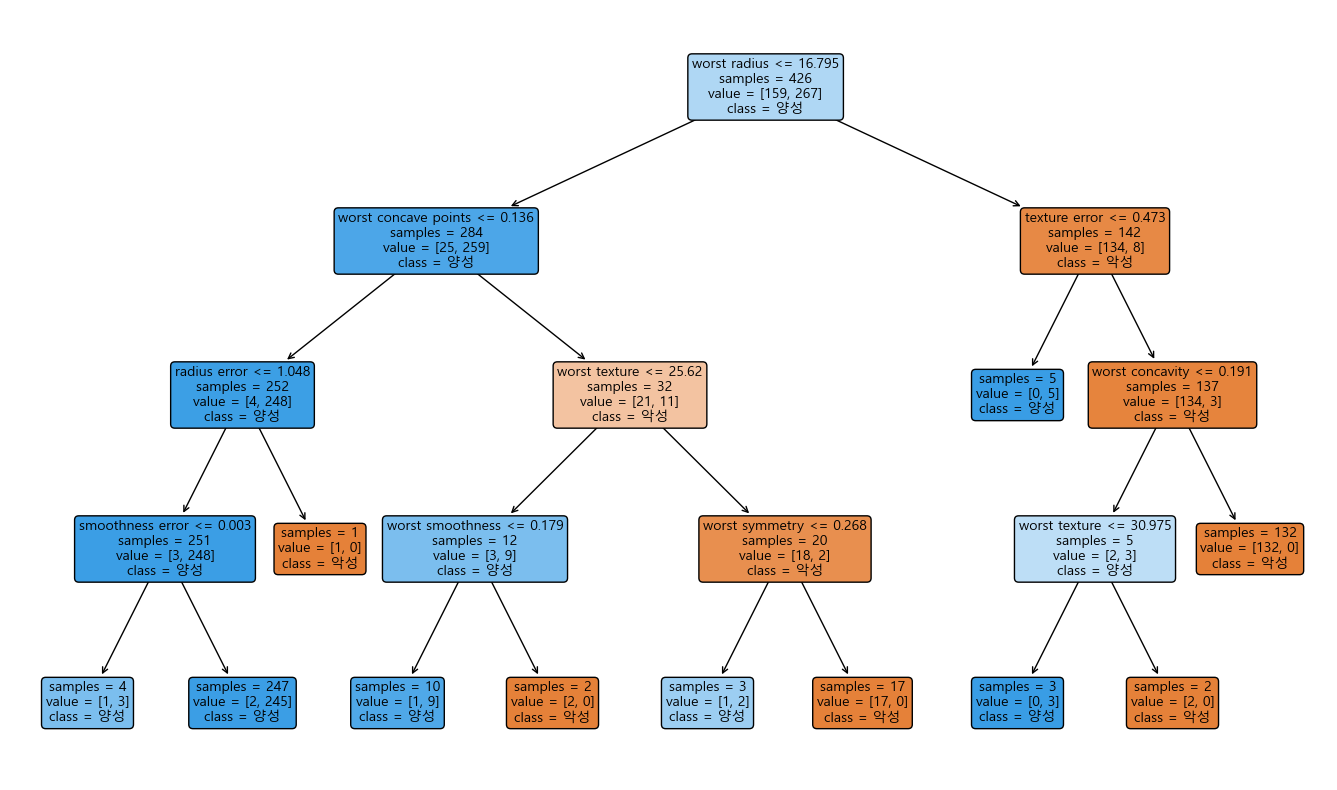

In [11]:
plt.figure(figsize=(17,10))
plot_tree(tree, class_names=["악성", "양성"],
          feature_names=cancer.feature_names.tolist(),
          impurity=False, filled=True, rounded=True, fontsize=10)

In [14]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

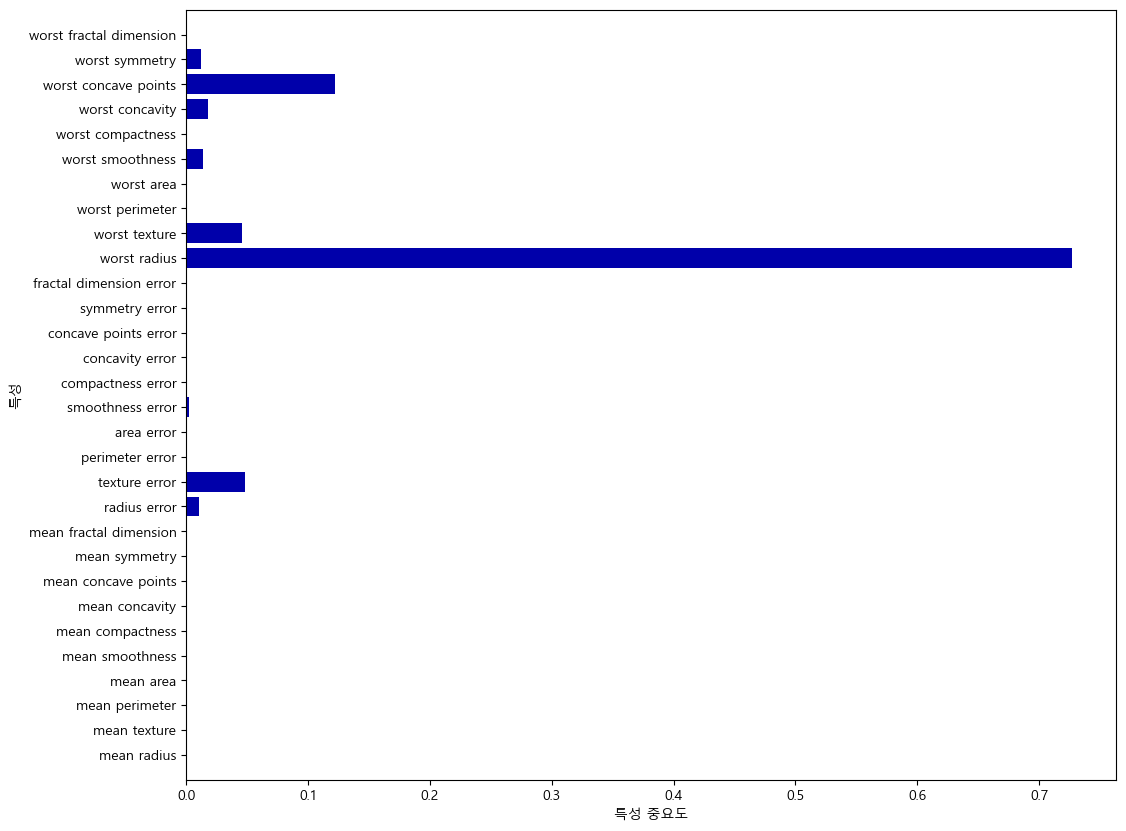

In [16]:
plt.figure(figsize=(12,10))
plot_feature_importances_cancer(tree)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [19]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

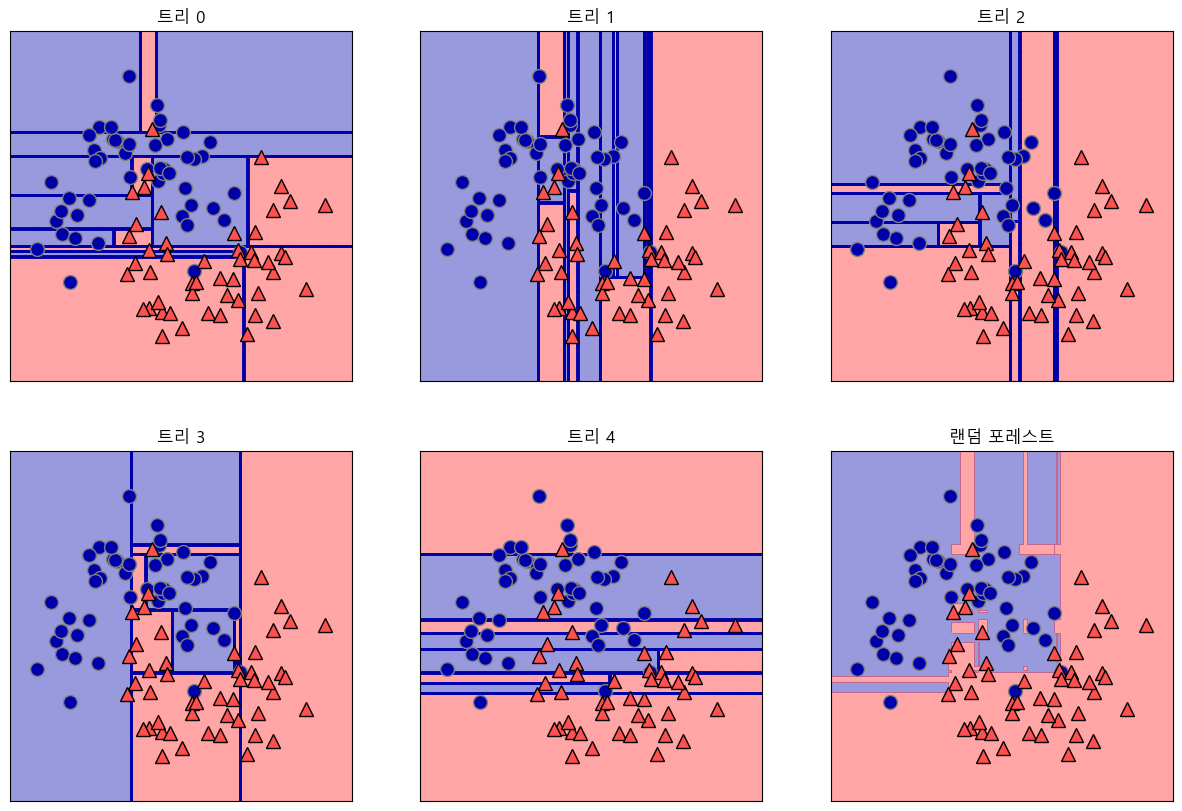

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"트리 {i}")
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
forest.score(X_train, y_train), forest.score(X_test, y_test)

(1.0, 0.958041958041958)